In [4]:
from __future__ import print_function
import librosa
import librosa.display
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

In [22]:
x, sr = librosa.load('D:/Music/A R Rahman/02 - Telephone Manipol.mp3', duration = 30, offset = 20) 

In [14]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

In [19]:
spectral_contrast = librosa.feature.spectral_contrast(x, sr=sr)
norm_sc = normalize(spectral_contrast, axis=1)
##spectral_contrast = np.mean(norm_sc, axis=1)
spectral_contrast.shape

(7, 216)

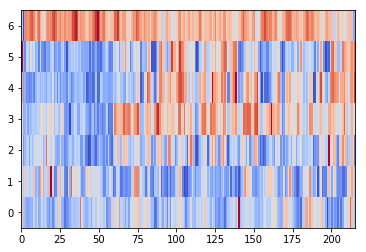

In [20]:
plt.imshow(norm_sc, aspect='auto', origin='lower', cmap='coolwarm')

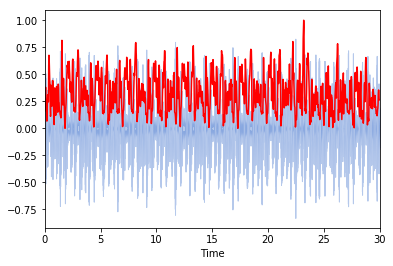

In [27]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
norm_scentroid = normalize(spectral_centroids)

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, norm_scentroid, color='r') # normalize for visualization purposes

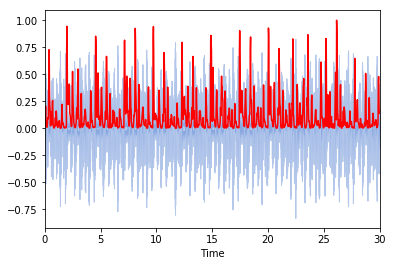

In [28]:
flatness = librosa.feature.spectral_flatness(y=x)
norm_sf = normalize(flatness.T)
##flatness.shape
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, norm_sf, color='r') # normalize for visualization purposes

In [29]:
print([np.mean(norm_sc, axis=1), np.mean(norm_scentroid), np.mean(norm_sf)])

[array([ 0.37814526,  0.34853291,  0.38024772,  0.53114695,  0.45055137,
        0.40264188,  0.68662601]), 0.32038169957746038, 0.11800957]


In [30]:
print([np.std(norm_sc, axis=1), np.std(norm_scentroid), np.std(norm_sf)])

[array([ 0.15366088,  0.19248831,  0.18579964,  0.20511548,  0.23805642,
        0.22129765,  0.136589  ]), 0.17442968888127355, 0.16918075]
